# Описание задачи

В этом задании необходимо достичь максимального качества предсказания, используя навыки полученные за 4 недели обучения

Кто достигнет максимального значения на тестовой выборке, получит *15 баллов*

Пожалуйста, оформляйте ноутбук аккуратно. Все выводы подписывайте, оформляйте заголовки.

Для справедливой оценки все должны использовать одну и ту же часть исходного датасета в качестве тестового набора данных. Используйте разбиение приведенное ниже


```
train_test_split(X, y, test_size = 0.3, random_state = 69)
```
И модель, с которой вы работаете - это линейная регрессия. Другие алгоритмы не используйте.

Метрика, которую вы должны максимизировать

```
r2_score(y_test, y_pred) и root_mean_squared_error(y_test, y_pred)
```

Целевая переменная - *count*

Обратите внимание на столбцы - 'casual', 'registered'. Эти столбцы в сумме дают целевую переменную, по этой причине их надо удалить. Они линейно зависимы.




Используйтие средства библиотеки sklearn, внимательно изучите ее. Существует огромное количество методов для выполнения каждого из этапов, не бойтесь использовать методы неприведенные в лекции

Этапы, которые необходимо проделать в работе для успешного достижения результата:
* EDA (Исследовать данные, понять с чем имеете дело, наработать идеи для генерации фичей и их обработки, обязательно корреляционные матрицы и графики с hue=классы объектов)
* Анализ выбросов и их обработка (в задачах классификации выброс - это объект с таким признаковым описанием, которое отличается очень сильно от типичного и больше соответствует другому классу)
* Генерация новых фичей
* Обработка пропусков (вы можете сгенерировать новые фичи с пропусками, тогда надо подумать об их обработке)
* Обработка категориальных признаков
* Масштабирование вещественных признаков
* Трансформирование таргета
* Нелинейные автоматические трансформации признаков (Kernel Trick, Transfomers)
* Подбор параметров модели (можете менять не только константы, но и оптимизационные алгоритмы и методы регуляризации)
* Отбор признаков
* Обязательно: Составление пайплайна обучения
* Обязательно: Постройте график зависимости y_pred от y_true в разбиении на test и train. Предсказание идеального алгоритма даст прямую y=x, посмотрите какой график получается у вас.

# Bike Sharing Demand
По историческим данным о прокате велосипедов и погодным условиям необходимо оценить спрос на прокат велосипедов.

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные.

### Библиотеки

In [388]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns

### Загрузка данных

In [389]:
df = pd.read_csv('bike_sharing_demand.csv')
df.sort_values(by='datetime', inplace=True)
df.drop(['casual', 'registered'], axis=1, inplace=True)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***casual*** - number of non-registered user rentals initiated

***registered*** - number of registered user rentals initiated

***count*** - number of total rentals

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [391]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


### Обогащение

In [392]:
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['day_of_week'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['day_of_year'] = pd.to_datetime(df['datetime']).dt.dayofyear
df['day_of_month'] = pd.to_datetime(df['datetime']).dt.day
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day_of_week,day_of_year,day_of_month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,1,5,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,5,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,1,5,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,1,5,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,1,5,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,12,2,354,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,12,2,354,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,12,2,354,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,12,2,354,19,22


### Выбросы

In [393]:
temperature_differences = (df['atemp'] - df['temp'])
temperature_differences.describe()

count    10886.000000
mean         3.424224
std          1.566612
min        -23.140000
25%          2.745000
50%          3.680000
75%          4.055000
max          8.045000
dtype: float64

Очень странные синие точки, когда температура и температура по ощущениям сильно различаются

In [394]:
px.scatter(df, x='temp', y='atemp', color=temperature_differences)

In [395]:
temperature_outliers_mask = temperature_differences < -10
df[temperature_outliers_mask].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day_of_week,day_of_year,day_of_month,hour
count,24.0,24.0,24.0,24.000000,24.000000,24.00,24.000000,24.000000,24.000000,24.0,24.0,24.0,24.0,24.000000
mean,3.0,0.0,1.0,1.375000,29.656667,12.12,57.083333,15.500729,297.833333,8.0,4.0,230.0,17.0,11.500000
std,0.0,0.0,0.0,0.646899,3.399630,0.00,16.589459,7.967729,219.428044,0.0,0.0,0.0,0.0,7.071068
min,3.0,0.0,1.0,1.000000,25.420000,12.12,30.000000,7.001500,6.000000,8.0,4.0,230.0,17.0,0.000000
25%,3.0,0.0,1.0,1.000000,26.855000,12.12,40.250000,8.998100,112.750000,8.0,4.0,230.0,17.0,5.750000
50%,3.0,0.0,1.0,1.000000,28.290000,12.12,58.000000,13.999650,315.500000,8.0,4.0,230.0,17.0,11.500000
75%,3.0,0.0,1.0,2.000000,33.620000,12.12,70.000000,20.500325,380.000000,8.0,4.0,230.0,17.0,17.250000
max,3.0,0.0,1.0,3.000000,35.260000,12.12,83.000000,31.000900,791.000000,8.0,4.0,230.0,17.0,23.000000


In [396]:
df = df.drop(index=df[temperature_outliers_mask].index)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day_of_week,day_of_year,day_of_month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,1,5,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,5,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,1,5,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,1,5,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,1,5,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,12,2,354,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,12,2,354,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,12,2,354,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,12,2,354,19,22


Сгруппируем по уровням влажности и посчитаем среднее продаж. Получаем красивое распределение точек, похожее на прямую, но вот там, где влажность <= 16, происходят не очень красивые вещи

In [397]:
df_group_by_humidity_mean = df.drop(['datetime'], axis=1).groupby('humidity').mean()
px.scatter(df_group_by_humidity_mean, df_group_by_humidity_mean.index,'count')

Как видно на гистограмме, количество наблюдений, когда влажность <= 16, мало по сравнению со всеми остальными наблюдениями, поэтому не страшно откинуть выбросы

<Axes: xlabel='humidity', ylabel='Count'>

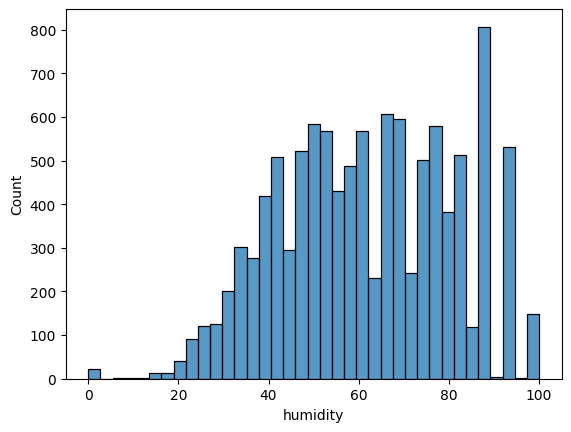

In [398]:
sns.histplot(df['humidity'])

Вот, таким выпросов всего 40 штук (весь датасет у нас 1886)

In [399]:
humidity_outliers_mask = df['humidity'] <= 16
df[humidity_outliers_mask].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day_of_week,day_of_year,day_of_month,hour
count,40.000000,40.0,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.100000,0.0,0.650000,2.050000,17.240500,20.85200,6.475000,23.850325,66.625000,2.825000,3.675000,68.050000,13.300000,11.650000
std,0.496139,0.0,0.483046,0.985797,2.403188,2.92157,7.407507,10.990636,88.270472,1.430214,1.118321,41.265215,4.456053,6.978171
min,1.000000,0.0,0.000000,1.000000,13.940000,15.91000,0.000000,6.003200,1.000000,2.000000,0.000000,45.000000,7.000000,0.000000
25%,1.000000,0.0,0.000000,1.000000,15.580000,19.69500,0.000000,16.498750,12.000000,2.000000,3.000000,50.000000,10.000000,5.750000
50%,1.000000,0.0,1.000000,2.500000,17.220000,21.21000,0.000000,21.001150,32.500000,3.000000,3.000000,69.000000,10.000000,12.500000
75%,1.000000,0.0,1.000000,3.000000,18.040000,21.97000,15.000000,29.248850,94.000000,3.000000,5.000000,69.000000,19.000000,16.250000
max,4.000000,0.0,1.000000,3.000000,24.600000,29.54500,16.000000,50.002100,413.000000,11.000000,5.000000,313.000000,19.000000,23.000000


In [400]:
df = df.drop(index=df[humidity_outliers_mask].index)

Теперь у нас точки красиво распологаются почти на прямой линии

In [401]:
df_group_by_humidity_mean = df.drop(['datetime'], axis=1).groupby('humidity').mean()
px.scatter(df_group_by_humidity_mean, df_group_by_humidity_mean.index,'count')

### Изучение

<Axes: >

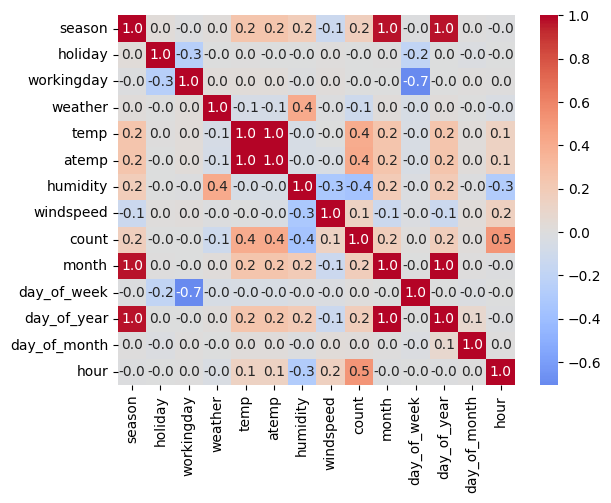

In [402]:
sns.heatmap(df.drop(['datetime'], axis=1).corr('spearman'), annot=True, fmt='.1f', cmap='coolwarm', center=0)

<Axes: xlabel='season', ylabel='Count'>

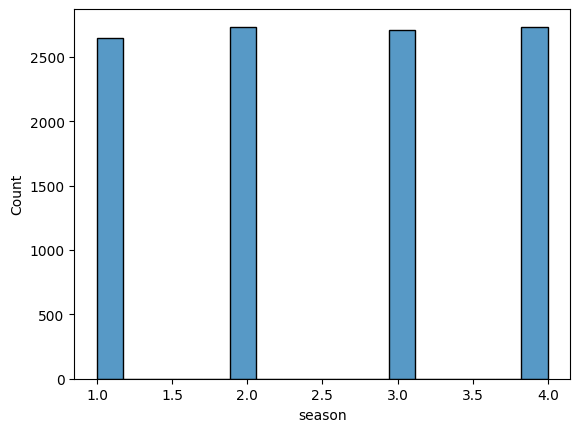

In [403]:
sns.histplot(df['season'])

<Axes: xlabel='holiday', ylabel='Count'>

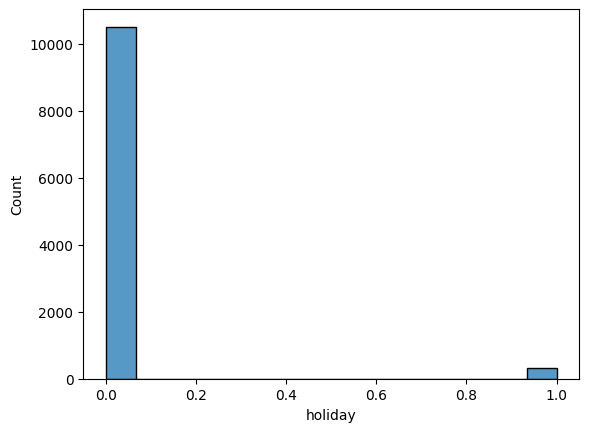

In [404]:
sns.histplot(df['holiday'])

<Axes: xlabel='workingday', ylabel='Count'>

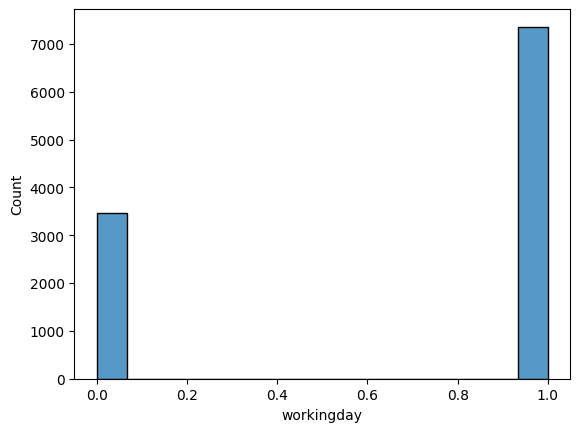

In [405]:
sns.histplot(df['workingday'])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day_of_week,day_of_year,day_of_month
hour,,,,,,,,,,,,,
0,2.508850,0.028761,0.681416,1.391593,19.003319,22.497699,68.378319,10.637643,55.238938,6.526549,3.006637,177.670354,9.946903
1,2.507761,0.028825,0.680710,1.430155,18.630909,22.045355,69.869180,10.372848,33.891353,6.521064,3.011086,177.512195,9.955654
2,2.528090,0.029213,0.680899,1.400000,18.447236,21.857382,70.932584,10.076725,22.970787,6.575281,3.011236,179.150562,9.937079
3,2.559165,0.027842,0.668213,1.403712,18.418608,21.837900,72.445476,10.157977,11.781903,6.705336,3.081206,183.102088,9.955916
4,2.547727,0.029545,0.672727,1.429545,18.021364,21.375761,73.775000,10.691312,6.409091,6.645455,3.018182,181.284091,9.947727


<Axes: xlabel='hour', ylabel='count'>

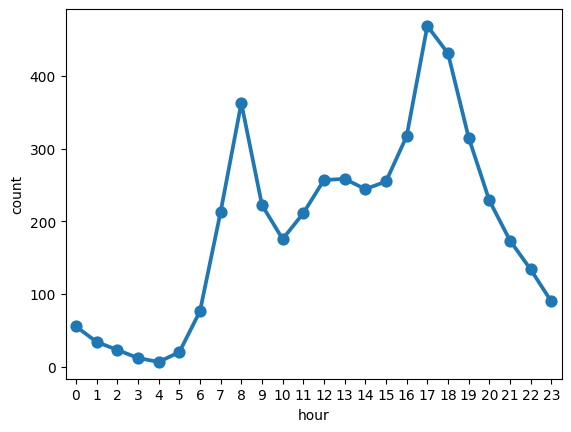

In [406]:
df_groupby_hour = df.drop(['datetime'], axis=1).groupby('hour')
display(df_groupby_hour.mean().head())
sns.pointplot(data=df_groupby_hour.mean(), x='hour', y='count')

Для каждого часа посчитали среднее количество продаж. Тут нет линейной зависимости, но есть какая-то зависимость. Видны подозрительные пики на 8 часов и 17-18 часов, а ночью активность спадает

<Axes: xlabel='day_of_year', ylabel='count'>

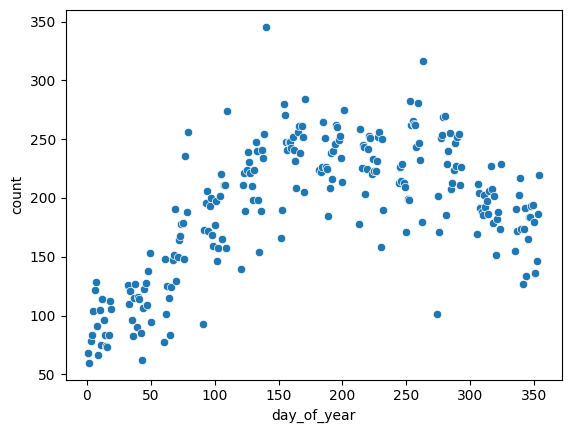

In [407]:
df_groupby_day_of_year = df.drop(['datetime'], axis=1).groupby('day_of_year')
sns.scatterplot(data=df_groupby_day_of_year.mean(), x='day_of_year', y='count')

В зависимости от дня, тут что-то циклическое. Зимой меньше покупают, лето чаще

Если посмотреть на scatterplot продаж от даты, то видим также циклическую картину

In [408]:
px.scatter(df, x='datetime', y='count', color='hour')

Ещё заметны дыры, потому что в каждом месяц

In [409]:
px.scatter(df, x='day_of_year', y='count', color='hour')

По дням недели ничего интересного я не выловил

<Axes: xlabel='day_of_week', ylabel='count'>

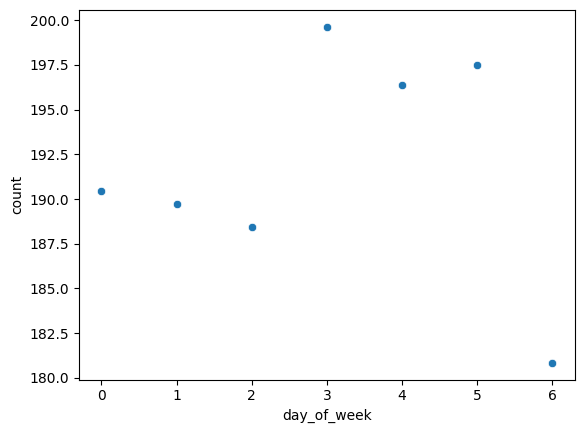

In [410]:
df_groupby_day_of_week = df.drop(['datetime'], axis=1).groupby('day_of_week')
sns.scatterplot(data=df_groupby_day_of_week.mean(), x='day_of_week', y='count')

<Axes: xlabel='atemp', ylabel='count'>

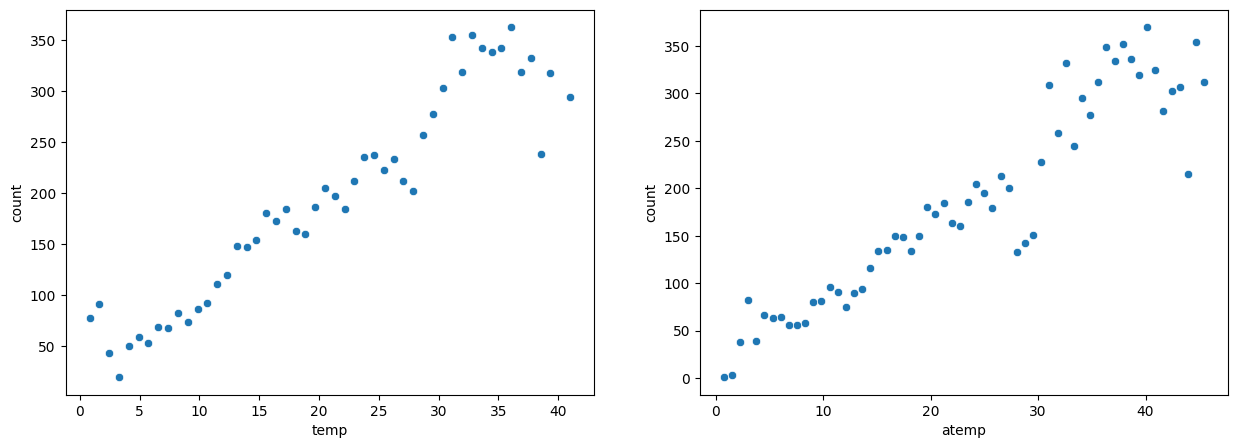

In [411]:
from cProfile import label


df_groupby_temp = df.drop(['datetime'], axis=1).groupby('temp')
df_groupby_atemp = df.drop(['datetime'], axis=1).groupby('atemp')
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=df_groupby_temp.mean(), x='temp', y='count', ax=axes[0])
sns.scatterplot(data=df_groupby_atemp.mean(), x='atemp', y='count', ax=axes[1])

<Axes: ylabel='count'>

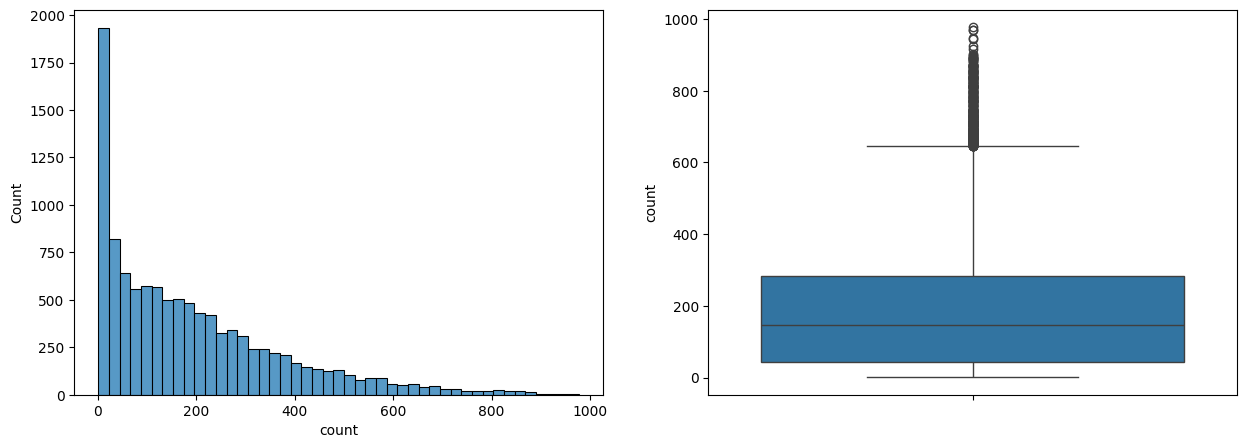

In [412]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['count'], ax=axes[0])
sns.boxplot(df['count'], ax=axes[1])


### Модель

In [413]:
y = df['count']
X = df.drop(['datetime', 'count'], axis=1)

numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'month', 'day_of_year', 'day_of_month', 'hour']
categorial_cols = ['season', 'holiday', 'workingday', 'weather', 'day_of_week']

X_numeric = X[numeric_cols]
X_categorial = X[categorial_cols]

display(X_numeric.head())
display(X_categorial.head())

,temp,atemp,humidity,windspeed,month,day_of_year,day_of_month,hour
0,9.84,14.395,81,0.0,1,1,1,0
1,9.02,13.635,80,0.0,1,1,1,1
2,9.02,13.635,80,0.0,1,1,1,2
3,9.84,14.395,75,0.0,1,1,1,3
4,9.84,14.395,75,0.0,1,1,1,4


,season,holiday,workingday,weather,day_of_week
0,1,0,0,1,5
1,1,0,0,1,5
2,1,0,0,1,5
3,1,0,0,1,5
4,1,0,0,1,5


Добавим полиномы фичей до третей степени. Три — оптимальное число, на четырёх уже модель выдаёт $R^2$ отрицательный

In [414]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(X_numeric)

In [415]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_poly_scaled.mean(), X_poly_scaled.std()

(np.float64(-1.1084224546738823e-15), np.float64(0.9999999999999996))

In [416]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
X_categorial_one_hot = encoder.fit_transform(X_categorial)
X_categorial_one_hot.shape

(10822, 19)

In [417]:
from sklearn.model_selection import train_test_split

(
    X_train_poly_scaled,
    X_test_poly_scaled,
    X_train_categorial_one_hot,
    X_test_categorial_one_hot,
    y_train,
    y_test,
) = train_test_split(X_poly_scaled, X_categorial_one_hot, y, test_size=0.3, random_state=69)

X_train = np.hstack([X_train_poly_scaled, X_train_categorial_one_hot])
X_test = np.hstack([X_test_poly_scaled, X_test_categorial_one_hot])
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7575, 183), (3247, 183), (7575,), (3247,))

In [418]:
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
estimator.fit(X_train, y_train)
r2 = estimator.score(X_test, y_test)
print(f'R2: {r2}')

R2: 0.5825966607009742


Тут я вывожу веса просто, чтобы посмотреть

In [419]:
estimator.coef_

array([ 1.10897743e+02, -1.80142175e+04,  8.81568431e+03, -4.65675437e+03,
        1.93612679e+07, -1.93408666e+07,  1.00613616e+06,  1.61545892e+03,
       -2.35070208e+03,  3.96427464e+03,  2.17558374e+03, -3.07996421e+03,
       -1.42103670e+03,  3.25125079e+03,  7.19986545e+02,  8.83939648e+02,
       -2.24593741e+03, -2.25936094e+03,  3.31747000e+03,  3.96012407e+05,
       -3.77623644e+05,  2.09690459e+04,  2.15536056e+02, -8.88566127e+02,
        2.06121311e+02, -2.29994946e+05,  2.23080107e+05, -1.11168379e+04,
       -7.10264773e+02,  1.11619630e+02,  7.15190318e+04, -6.80979251e+04,
        3.78465934e+03,  2.01833658e+02, -2.51132639e+08,  4.76447392e+08,
       -1.89179529e+07, -2.34632845e+04, -2.25571923e+08,  1.83981505e+07,
        2.29007531e+04, -6.55135626e+05, -1.21555031e+03, -3.56148546e+02,
        1.25804822e+04, -4.31637009e+04,  1.40399975e+03,  2.13674323e+02,
        4.75187638e+04, -4.50226690e+04,  2.62770612e+03,  1.05966767e+03,
        4.70369310e+04, -